In [138]:
# load data

import json

data = None
with open('./classifier_data.json') as file :
    data = json.load(file)

allChunks = list()
for policy in data :
    allChunks.extend(policy['chunks'])
    
labels = None
with open('./labels.json') as file :
    labels = json.load(file)

In [264]:
# logistic regression classifier

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

def logisticRegression(labelName, data, printRes) :
    df = pd.DataFrame(data)
    if labelName == 'important' :
        df['important'] = df['important'].map({ True: 1, False: 0 })

    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
        
    X_train = X_test = y_train = y_test = None
    X = df['text']
    y = df[labelName]
    X_vectorized = vectorizer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

    # print counts
    if printRes :
        print(y_train.value_counts())
        print(y_test.value_counts())

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    if printRes :
        print(f'Classification Report for {labelName}:')
        print(classification_report(y_test, y_pred))
        print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    
    return [model, vectorizer, X_test, y_test, y_pred, X_train, y_train]

logisticRegression('important', allChunks, True)
print('\n-----------------------------------------------------------\n')
logisticRegression('label', allChunks, True)

important = ["Children's policy", 'Data rights', 'Advertising']
both = ['Personal data', 'Cookies', 'Data sharing', 'Other data collection']


important
0    2050
1     717
Name: count, dtype: int64
important
0    528
1    164
Name: count, dtype: int64
Classification Report for important:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       528
           1       0.74      0.48      0.58       164

    accuracy                           0.84       692
   macro avg       0.80      0.71      0.74       692
weighted avg       0.83      0.84      0.82       692

Accuracy: 0.84

-----------------------------------------------------------

label
Random                         320
Other                          298
Data rights                    282
Personal data                  267
Data use                       178
Third party sites              167
Data sharing                   144
Other data collection          123
Website data                   115
Intro                          110
Cookies                        107
Contact                         90
Data security          

/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LogisticRegression(),
 TfidfVectorizer(max_features=1000, stop_words='english'),
 <692x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 16729 stored elements in Compressed Sparse Row format>,
 665             Data retention
 410              Personal data
 2686                     Other
 2222    Data in other counries
 2609                     Other
                  ...          
 1187                    Random
 2313              Data sharing
 2251                    Random
 611          Third party sites
 2129              Data sharing
 Name: label, Length: 692, dtype: object,
 array(['Data retention', 'Data use', 'Other', 'Other', 'Intro', 'Random',
        'Third party sites', 'Random', 'Random', 'Third party sites',
        'Random', 'Personal data', 'Advertising', 'Data rights',
        'Data rights', 'Other', 'Other', 'Random',
        'Legality of data processing', 'Legality of data processing',
        'Data use', 'Other', 'Random', 'Data use', 'Other', 'Other',
  

/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


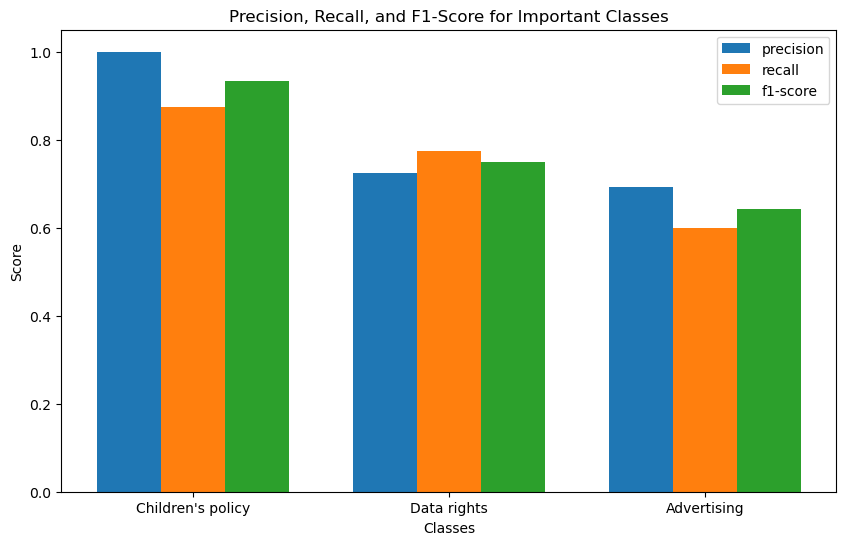

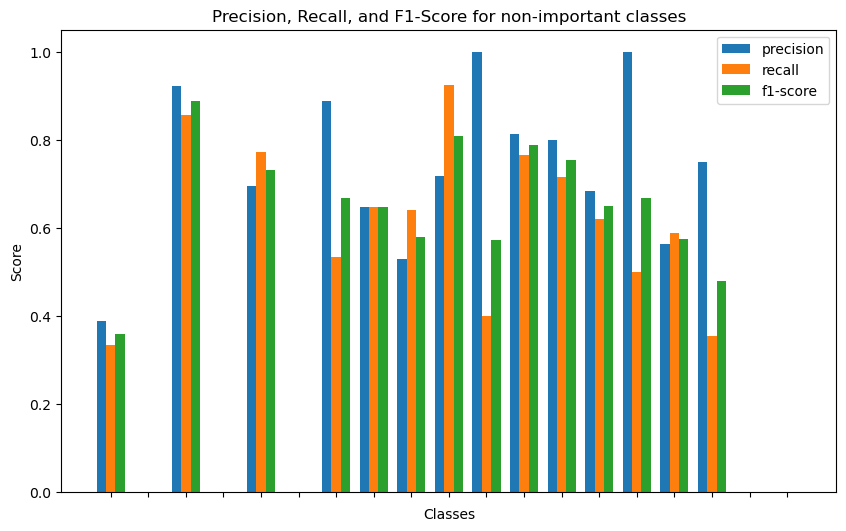

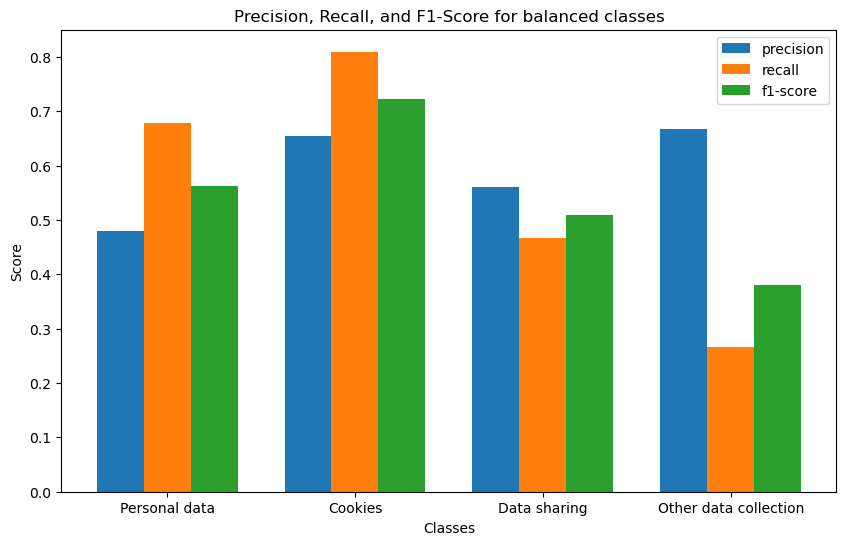

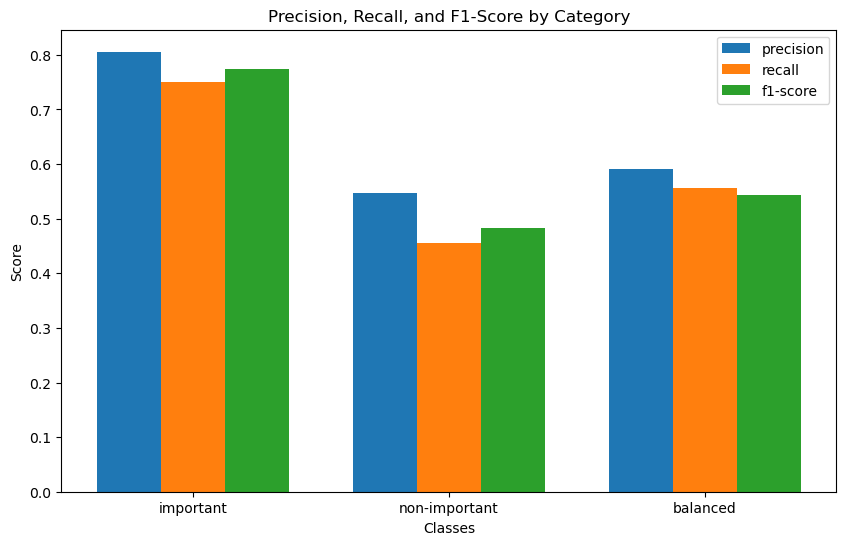

In [243]:
# make graphs

import matplotlib.pyplot as plt
import numpy as np

# label types
important = ["Children's policy", 'Data rights', 'Advertising']
nonImportant1 = ['Intro', 'Modification', 'Third party sites', 'End', 'Website data',
               'Data security', 'Other', 'Random', 'Data retention',
                'Legality of data processing', 'Contact' 'Data use', 'Data in other counries']
both = ['Personal data', 'Cookies', 'Data sharing', 'Other data collection']

res = logisticRegression('label', allChunks, False)
report = classification_report(res[3], res[4], output_dict=True)

def makeGraph(labels, showXLabels, title) :
    metrics = ['precision', 'recall', 'f1-score']
    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))
    
    averages = dict()

    for i, metric in enumerate(metrics) :
        metricValues = [report[label][metric] for label in labels]
        ax.bar(x + i * width, metricValues, width, label=metric)
        averages[i] = sum(metricValues) / len(metricValues)

    ax.set_xticks(x + width)
    if showXLabels :
        ax.set_xticklabels(labels)
    else :
        ax.set_xticklabels(['']*len(labels))
    ax.set_xlabel('Classes')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.legend()

    plt.savefig(title + '.png')
    plt.show()
    
    return averages

# create a graph for each type. the method returns the average
importantAverages = makeGraph(important, True, 'Precision, Recall, and F1-Score for Important Classes')
nonImportantAverages = makeGraph(nonImportant, False, 'Precision, Recall, and F1-Score for non-important classes')
bothAverages = makeGraph(both, True, 'Precision, Recall, and F1-Score for balanced classes')

# graph the averages
metrics = ['precision', 'recall', 'f1-score']
x = np.arange(3)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, [importantAverages[0], nonImportantAverages[0], bothAverages[0]], width, label='precision')
ax.bar(x + width, [importantAverages[1], nonImportantAverages[1], bothAverages[1]], width, label='recall')
ax.bar(x + 2 * width, [importantAverages[2], nonImportantAverages[2], bothAverages[2]], width, label='f1-score')

ax.set_xticks(x + width)
ax.set_xticklabels(['important', 'non-important', 'balanced'])
ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Category')
ax.legend()

plt.savefig('Precision, Recall, and F1-Score by Category.png')
plt.show()

In [270]:
# percentage of important chunks
print(717 / (2050 + 717))
print(164 / (164 + 528))

0.25912540657752076
0.23699421965317918


In [206]:
# average of important chunks per document

percents = list()
percentTotal = 0
for policy in data :
    important = 0
    total = 0
    for chunks in policy['chunks'] :
        if chunks['important'] :
            important += 1
        total += 1
    percents.append(important / total)
    percentTotal += important / total

print(percentTotal / len(data))

0.27394595948111156


In [265]:
# create a logistic regression classifier for each type of label

chunksByLabel = dict()
for label in labels :
    chunksByLabel[label] = list()
for policy in data :
    for chunk in policy['chunks'] :
        chunksByLabel[chunk['label']].append(chunk)

importanceModels = dict()
for label, chunks in chunksByLabel.items() :
    print(label)
    print(len(chunks))
    try :
        importanceModels[label] = logisticRegression('important', chunks, True)
    except :
        print('only one label type')
    print('\n-----------------------------------------------------------\n')

Intro
131
important
0    104
Name: count, dtype: int64
important
0    27
Name: count, dtype: int64
only one label type

-----------------------------------------------------------

TOC
13
important
0    10
Name: count, dtype: int64
important
0    3
Name: count, dtype: int64
only one label type

-----------------------------------------------------------

Modification
72
important
0    56
1     1
Name: count, dtype: int64
important
0    14
1     1
Name: count, dtype: int64
Classification Report for important:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15

Accuracy: 0.93

-----------------------------------------------------------

Personal data
320
important
1    176
0     80
Name: count, dtype: int64
important


/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt

important
0    80
1     5
Name: count, dtype: int64
important
0    20
1     2
Name: count, dtype: int64
Classification Report for important:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.00      0.00      0.00         2

    accuracy                           0.91        22
   macro avg       0.45      0.50      0.48        22
weighted avg       0.83      0.91      0.87        22

Accuracy: 0.91

-----------------------------------------------------------

Contact
111
important
0    88
Name: count, dtype: int64
important
0    23
Name: count, dtype: int64
only one label type

-----------------------------------------------------------

Newsletter
14
important
0    11
Name: count, dtype: int64
important
0    3
Name: count, dtype: int64
only one label type

-----------------------------------------------------------

Other data collection
153
important
0    97
1    25
Name: count, dtype: int64
important
0 

/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
# create a map for the labels which are either completely important or non-important

labelImportanceMap = {
    'Intro': 0,
    'TOC': 0,
    'Do not track': 0,
    "Children's policy": 1,
    'End': 0,
    'Random': 0,
    'Location of processing': 0,
    'Contact': 0,
    'Newsletter': 0,
    'emails': 0,
    'Full policy': 1
}

In [260]:
# combine label classifier with important classifier

import numpy as np
from sklearn.metrics import accuracy_score, classification_report

labelsModel = logisticRegression('label', allChunks, False)

df = pd.DataFrame(allChunks)
df['important'] = df['important'].map({ True: 1, False: 0 })

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X_test = test_df['text'].tolist()
y_test_importance = test_df['important'].tolist()

predicted_importance = []

for i, text in enumerate(X_test) :
    # predict the label
    text_vectorized = labelsModel[1].transform([text])
    predicted_identifier = labelsModel[0].predict(text_vectorized)[0]
    
    importance_prediction = None
    # if there is a mix of important and non-important, use that classifier
    if predicted_identifier in importanceModels :
        text_vectorized = importanceModels[predicted_identifier][1].transform([text])
        importance_prediction = importanceModels[predicted_identifier][0].predict(text_vectorized)[0]
    else : # otherwise refer  to the labelMap
        importance_prediction = labelImportanceMap[predicted_identifier]

    predicted_importance.append(importance_prediction)

print(classification_report(y_test_importance, predicted_importance))
print(f'Accuracy: {accuracy_score(y_test_importance, predicted_importance):.2f}')

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       528
           1       0.65      0.66      0.66       164

    accuracy                           0.84       692
   macro avg       0.77      0.78      0.77       692
weighted avg       0.84      0.84      0.84       692

Accuracy: 0.84


In [268]:
# neural network classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical

def NN(labelName) :
    df = pd.DataFrame(allChunks)
    if labelName == 'important' :
        df['important'] = df['important'].map({ True: 1, False: 0 })
        y = df[labelName]
    else :
        labelMapping = dict()
        for i, label in enumerate(labels) :
            labelMapping[label] = i
        df['label'] = df['label'].map(labelMapping)
        y = to_categorical(df['label'], num_classes=len(labels))
    
    X = df['text']

    MAX_NUM_WORDS = 100000
    MAX_SEQUENCE_LENGTH = 200

    tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
    tokenizer.fit_on_texts(X)
    X_sequences = tokenizer.texts_to_sequences(X)

    X_padded = pad_sequences(X_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
    
    model = None
    if labelName == 'important' :
        model = Sequential([
            Embedding(input_dim=MAX_NUM_WORDS, output_dim=128),
            GlobalAveragePooling1D(),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    else :
        model = Sequential([
            Embedding(input_dim=MAX_NUM_WORDS, output_dim=128),
            GlobalAveragePooling1D(),  # Can also try GRU or a simple dense layer
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dense(len(labels), activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,
        verbose=1
    )
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f'Test Accuracy: {accuracy:.2f}')
    y_pred = (model.predict(X_test) > 0.5).astype('int32')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

NN('important')
NN('label')

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7177 - loss: 0.5847 - val_accuracy: 0.7789 - val_loss: 0.5231
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7604 - loss: 0.5291 - val_accuracy: 0.7789 - val_loss: 0.4748
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7898 - loss: 0.4745 - val_accuracy: 0.7934 - val_loss: 0.4376
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8105 - loss: 0.4308 - val_accuracy: 0.8020 - val_loss: 0.4117
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8273 - loss: 0.4090 - val_accuracy: 0.8064 - val_loss: 0.4075
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8520 - loss: 0.3687 - val_accuracy: 0.8251 - val_loss: 0.3942
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8720 - loss: 0.3294 - val_accuracy: 0.8280 - val_loss: 0.3922
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8533 - loss: 0.3407 - val_accuracy: 0.8309 - v

/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cs375/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/